Random Forest Model

In [23]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [25]:
df = pd.read_csv('data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          14606 non-null  object 
 1   cons_12m                                    14606 non-null  float64
 2   cons_gas_12m                                14606 non-null  float64
 3   cons_last_month                             14606 non-null  float64
 4   forecast_cons_12m                           14606 non-null  float64
 5   forecast_discount_energy                    14606 non-null  int64  
 6   forecast_meter_rent_12m                     14606 non-null  float64
 7   forecast_price_energy_off_peak              14606 non-null  float64
 8   forecast_price_energy_peak                  14606 non-null  float64
 9   forecast_price_pow_off_peak                 14606 non-null  float64
 10  has_gas   

In [26]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


In [29]:
# Add model training in here!
model = RandomForestClassifier(n_estimators= 100) # Add parameters to the model!
model.fit(X_train, y_train) # Complete this method call!

RandomForestClassifier()

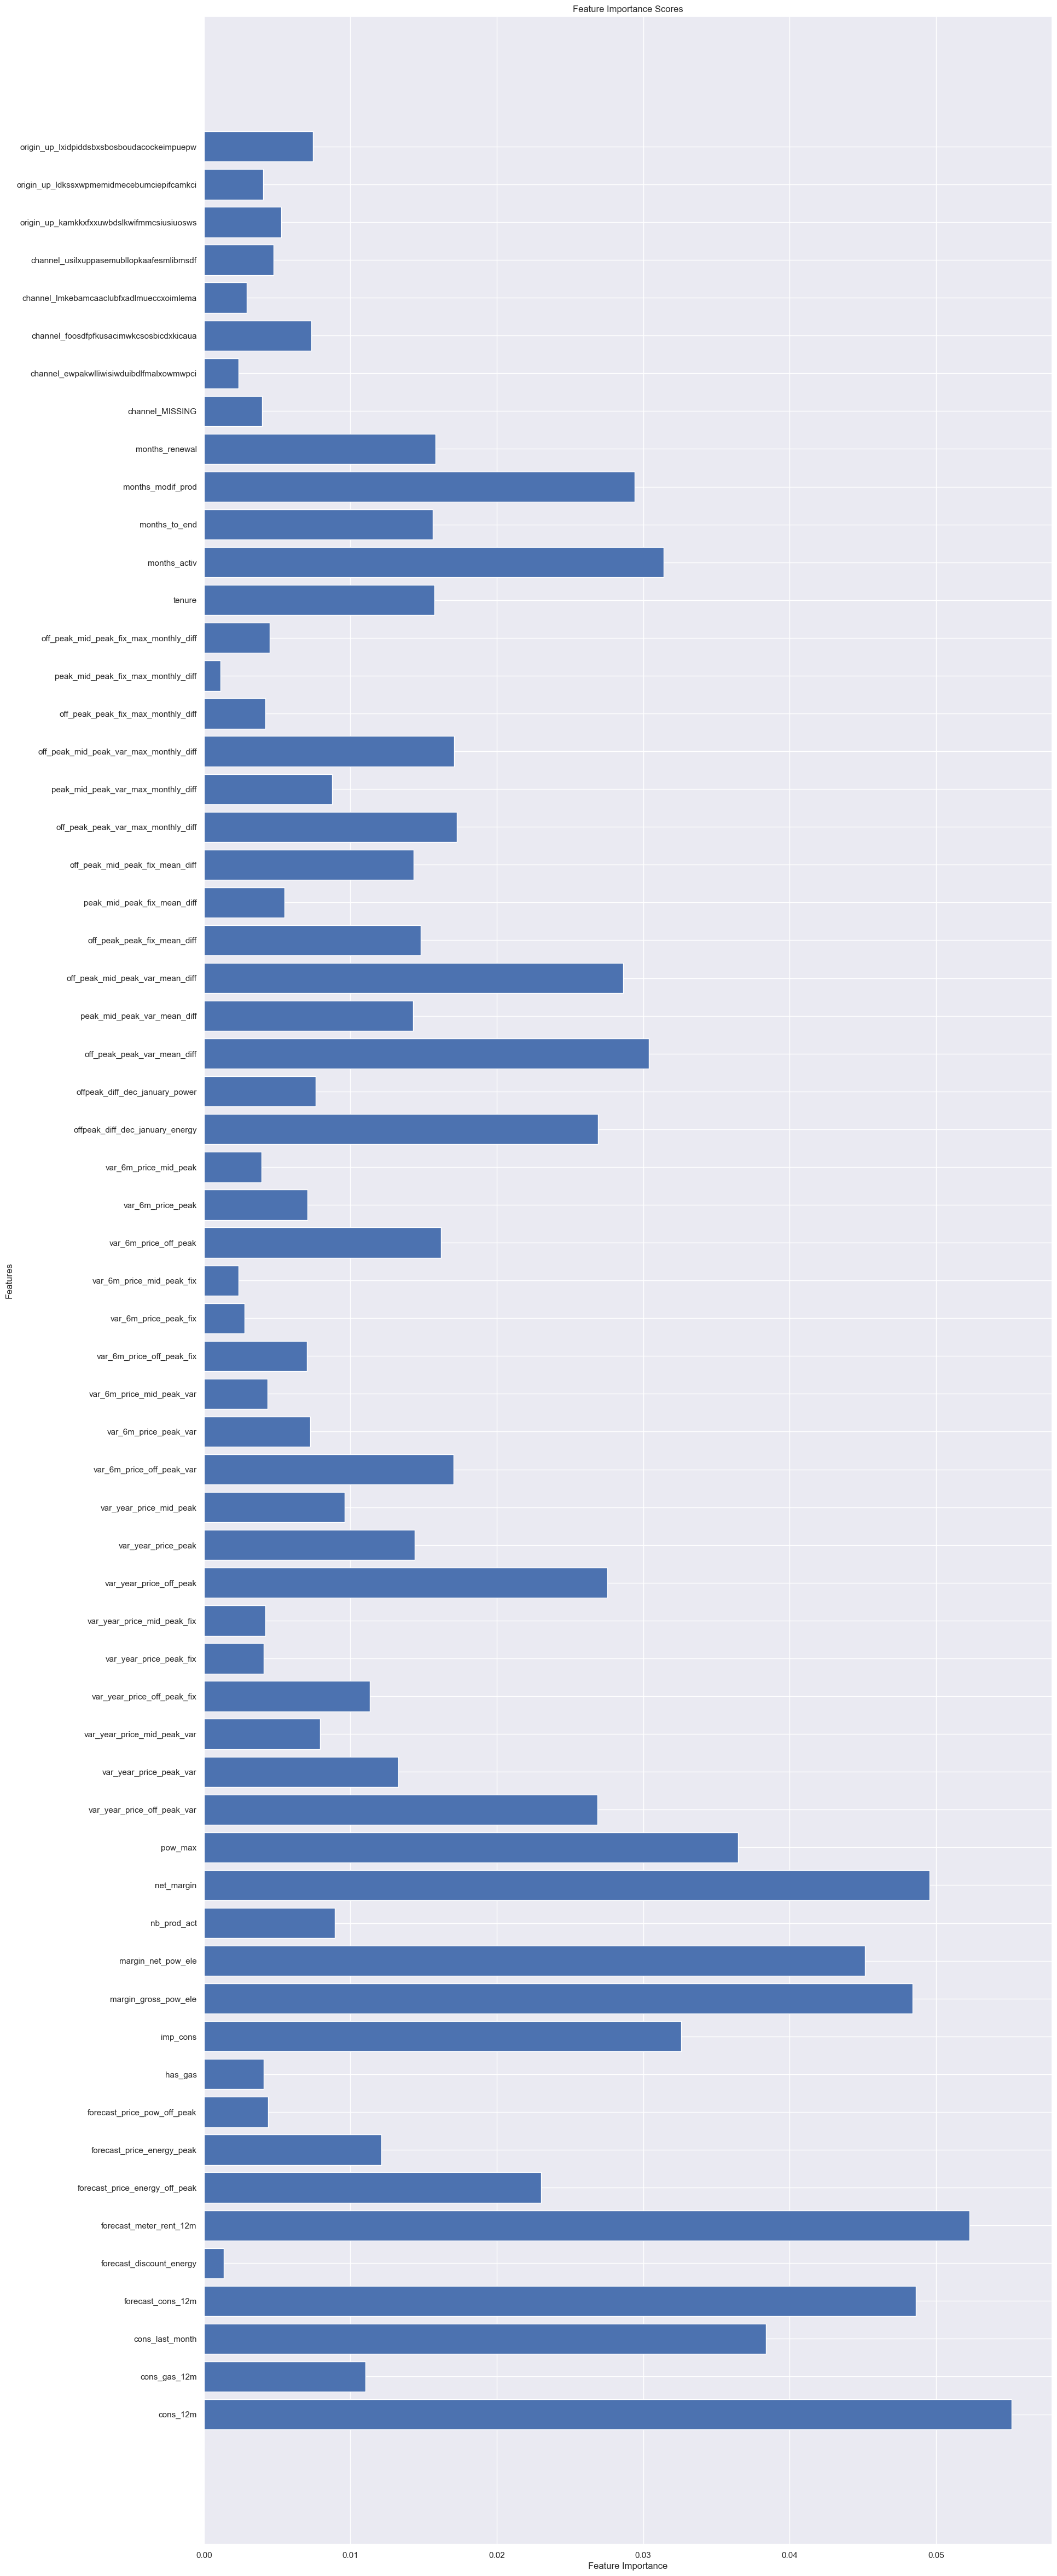

In [30]:
#PLot to see which features were important
feature_importance = model.feature_importances_
# List of feature names
feature_names = [
    'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
    'forecast_discount_energy', 'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
    'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
    'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
    'net_margin', 'pow_max', 'var_year_price_off_peak_var',
    'var_year_price_peak_var', 'var_year_price_mid_peak_var',
    'var_year_price_off_peak_fix', 'var_year_price_peak_fix',
    'var_year_price_mid_peak_fix', 'var_year_price_off_peak',
    'var_year_price_peak', 'var_year_price_mid_peak',
    'var_6m_price_off_peak_var', 'var_6m_price_peak_var',
    'var_6m_price_mid_peak_var', 'var_6m_price_off_peak_fix',
    'var_6m_price_peak_fix', 'var_6m_price_mid_peak_fix',
    'var_6m_price_off_peak', 'var_6m_price_peak', 'var_6m_price_mid_peak',
    'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power',
    'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff',
    'off_peak_mid_peak_var_mean_diff', 'off_peak_peak_fix_mean_diff',
    'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff',
    'off_peak_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff',
    'tenure', 'months_activ', 'months_to_end', 'months_modif_prod',
    'months_renewal', 'channel_MISSING', 'channel_ewpakwlliwisiwduibdlfmalxowmwpci',
    'channel_foosdfpfkusacimwkcsosbicdxkicaua', 'channel_lmkebamcaaclubfxadlmueccxoimlema',
    'channel_usilxuppasemubllopkaafesmlibmsdf', 'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
    'origin_up_ldkssxwpmemidmecebumciepifcamkci', 'origin_up_lxidpiddsbxsbosboudacockeimpuepw'
]

plt.figure(figsize=(20, 60))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)  
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

In [31]:
#Predictions
y_pred = model.predict(X_test)

In [32]:
#Metrics
print("Precision of the model: ", metrics.precision_score(y_test,y_pred))
print("Recall of the model: ", metrics.recall_score(y_test,y_pred))


Precision of the model:  0.782608695652174
Recall of the model:  0.04918032786885246


#Why I chose my metrics
I used precision and recall for as my metrics. 
Precision because I wanted to know of my predicted positives were are actually positives. I also wanted to know how many positives were successfully predicted.

#Did my model perform well
My model shows that when my model predict the churning it is accurate about 78.3% of the time , but my model also only got about 4.9% of actual churn instances. This shows that it missed quite a few number of customers that churned. I believe my model did not perform so well because the company needs to know the customers who would churn , but my model does not seem to get that so well.